<a href="https://colab.research.google.com/github/minhcong01/BT_AI/blob/main/fashion_mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# BAI TAP TRAIN DATA FASHION MNIST
#thu vien
import tensorflow as tf
from keras import datasets, layers, models
from keras.models import Sequential, Model
from keras.layers import Dense,Activation,Dropout, Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt
from keras.utils import np_utils
import numpy as np

In [ ]:
#tai du lieu
(X_train, y_train),(X_test,y_test)=datasets.fashion_mnist.load_data()

In [ ]:
#Dac diem du lieu
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


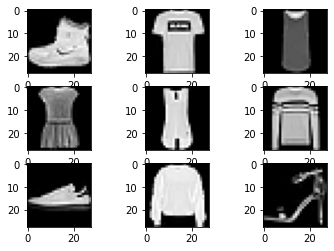

In [ ]:
#tao luoi anh 3x3
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
plt.show()
X_train=X_train.astype ('float32')
X_test=X_test.astype ('float32')
X_train/=255
X_test/=255
y_train=np_utils.to_categorical (y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
#tao mo hinh va train
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()
opt=SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,batch_size=64,validation_data=(X_test,y_test),verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1605760   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


938/938 [==============================] - 7s 8ms/step - loss: 0.4026 - accuracy: 0.8553 - val_loss: 0.3198 - val_accuracy: 0.8856
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2638 - accuracy: 0.9038 - val_loss: 0.2778 - val_accuracy: 0.8968
Epoch 3/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2131 - accuracy: 0.9216 - val_loss: 0.2755 - val_accuracy: 0.9009
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 0.1758 - accuracy: 0.9353 - val_loss: 0.2467 - val_accuracy: 0.9132
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.1471 - accuracy: 0.9463 - val_loss: 0.2353 - val_accuracy: 0.9177
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 0.1180 - accuracy: 0.9573 - val_loss: 0.2579 - val_accuracy: 0.9132
Epoch 7/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0964 - accuracy: 0.9652 - val_loss: 0.2582 - val_accuracy: 0.9162
Epoch 8/10
938/93

In [ ]:
# ket qua cua qua trinh train va test
score=model.evaluate(X_test,y_test,verbose=0)
print('sai so kien tra la:',score[0])
print('Do chinh xac kiem tra:', score[1])

sai so kien tra la: 0.2986476421356201
Do chinh xac kiem tra: 0.9189000129699707


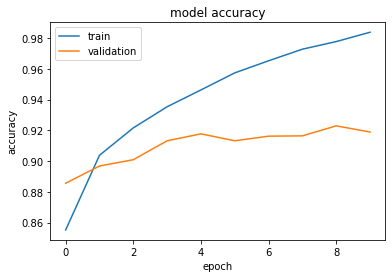

In [ ]:
#do thi bieu dien kq train
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
model.save('fashion_mnist_CNN.h5')